**Home Work#1 for NLP Course SUT**

**Installing Requierd Libs** 

In [1]:
! pip install -q hazm
! pip install -q gensim
! pip -q install clean-text[gpl]
! pip install -q pandas
! pip install -q arabic_reshaper
! pip install -q python-bidi
! pip install -q seaborn
! pip install -q parsivar
! pip install -q stanza
! pip install -q findspark

     |████████████████████████████████| 316 kB 4.0 MB/s 
     |████████████████████████████████| 233 kB 44.9 MB/s 
     |████████████████████████████████| 1.4 MB 49.6 MB/s 
     |████████████████████████████████| 53 kB 1.2 MB/s 
     |████████████████████████████████| 175 kB 7.5 MB/s 
     |████████████████████████████████| 235 kB 47.7 MB/s 
     |████████████████████████████████| 36.2 MB 367 kB/s 
     |████████████████████████████████| 1.5 MB 35.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
hazm 0.7.0 requires nltk==3.3, but you have nltk 3.4.5 which is incompatible.
     |████████████████████████████████| 691 kB 4.1 MB/s 


**Install Open JDK for Spark and Hadoop**

In [2]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz


--2022-11-08 15:00:26--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 18.205.222.128, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  4.21MB/s    in 3.1s    

2022-11-08 15:00:30 (4.21 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from glob import glob

In [5]:
files = glob('/content/drive/MyDrive/akhbar/9*')

In [6]:
files.sort()
files

['/content/drive/MyDrive/akhbar/92798.txt',
 '/content/drive/MyDrive/akhbar/92801.txt',
 '/content/drive/MyDrive/akhbar/92804.txt',
 '/content/drive/MyDrive/akhbar/92805.txt',
 '/content/drive/MyDrive/akhbar/92808.txt',
 '/content/drive/MyDrive/akhbar/92809.txt',
 '/content/drive/MyDrive/akhbar/92810.txt',
 '/content/drive/MyDrive/akhbar/92811.txt',
 '/content/drive/MyDrive/akhbar/92813.txt',
 '/content/drive/MyDrive/akhbar/92814.txt',
 '/content/drive/MyDrive/akhbar/92815.txt',
 '/content/drive/MyDrive/akhbar/92816.txt',
 '/content/drive/MyDrive/akhbar/92818.txt',
 '/content/drive/MyDrive/akhbar/92822.txt',
 '/content/drive/MyDrive/akhbar/92823.txt',
 '/content/drive/MyDrive/akhbar/92824.txt',
 '/content/drive/MyDrive/akhbar/92826.txt',
 '/content/drive/MyDrive/akhbar/92828.txt',
 '/content/drive/MyDrive/akhbar/92833.txt',
 '/content/drive/MyDrive/akhbar/92834.txt',
 '/content/drive/MyDrive/akhbar/92835.txt',
 '/content/drive/MyDrive/akhbar/92838.txt',
 '/content/drive/MyDrive/akhbar/

In [7]:
import pandas as pd
import numpy as np
import re
import hazm
import nltk
import codecs
import tqdm
import gensim
from cleantext import clean
import matplotlib.pyplot as plt

In [8]:
i=0
for file in files:
  i=i+1
  print(file)
  if(i == 10):
    break

/content/drive/MyDrive/akhbar/92798.txt
/content/drive/MyDrive/akhbar/92801.txt
/content/drive/MyDrive/akhbar/92804.txt
/content/drive/MyDrive/akhbar/92805.txt
/content/drive/MyDrive/akhbar/92808.txt
/content/drive/MyDrive/akhbar/92809.txt
/content/drive/MyDrive/akhbar/92810.txt
/content/drive/MyDrive/akhbar/92811.txt
/content/drive/MyDrive/akhbar/92813.txt
/content/drive/MyDrive/akhbar/92814.txt


In [9]:
dataset = []
for file in files:
    with open(file) as f:
        data = f.read()
        dataset.append(data)

In [10]:
dataset_pd = pd.DataFrame(columns=["text"])

In [11]:
dataset_pd["text"] = dataset

In [12]:
dataset_pd.head()

,text
0,پنتاگون در آستانه تعطیل دولت، ۵ میلیارد دلار ت...
1,هشدار رئیس‌جمهور چین نسبت به تهدید‌های فزاینده...
2,در گفت و گو با راديو فردا:شيمون پرز: مردم ايرا...
3,آمریکا برای حمله به سوریه آماده می‌شود\nوزیر د...
4,مشاور اوباما: تجمع حوثی‌ها در صنعا را محکوم می...


In [13]:
from parsivar import Tokenizer

In [14]:
tokenizer = Tokenizer()

In [15]:
dataset_pd["tokens"] = dataset_pd["text"].apply(tokenizer.tokenize_words)

In [16]:
dataset_pd.head()

,text,tokens
0,پنتاگون در آستانه تعطیل دولت، ۵ میلیارد دلار ت...,"[پنتاگون, در, آستانه, تعطیل, دولت،, ۵, میلیارد..."
1,هشدار رئیس‌جمهور چین نسبت به تهدید‌های فزاینده...,"[هشدار, رئیس‌جمهور, چین, نسبت, به, تهدید‌های, ..."
2,در گفت و گو با راديو فردا:شيمون پرز: مردم ايرا...,"[در, گفت, و, گو, با, راديو, فردا:شيمون, پرز:, ..."
3,آمریکا برای حمله به سوریه آماده می‌شود\nوزیر د...,"[آمریکا, برای, حمله, به, سوریه, آماده, می‌شود,..."
4,مشاور اوباما: تجمع حوثی‌ها در صنعا را محکوم می...,"[مشاور, اوباما:, تجمع, حوثی‌ها, در, صنعا, را, ..."


**Plot Utils**
following function is responsible for plotting top 8 common categories resulting from LDA and NMF algorithms



In [20]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

**Label Persian Compatibility**
following functions are needed to print persian labels on plot in right to left direction



In [21]:
from arabic_reshaper import reshape
from bidi.algorithm import get_display
import seaborn as sns
def make_farsi_text(x):
    if x == 'الله':
        return 'هللا'
    reshaped_text = reshape(x)
    farsi_text = get_display(reshaped_text)
    return farsi_text

**Load Stopwords from stopwords.txt**

In [22]:
stopwords = [x.strip() for x in codecs.open('stopwords.txt','r','utf-8').readlines()]


**Instantiate Hazm Normalizer into normalizer variable**

In [23]:
dataset_pd['text'][0]

'پنتاگون در آستانه تعطیل دولت، ۵ میلیارد دلار تجهیزات نظامی خرید\nب پیش از فرستاده شدن ۸۰۰ هزار کارمند دولت آمریکا به مرخصی بدون حقوق، پنتاگون قرارداد خرید ۵ میلیارد دلار تجهیزات نظامی را امضا کرد.\nبه گزارش خبرگزاری دانشجویان ایران (ایسنا)، برپایه گزارش مجله "سیاست خارجی" (Foreign Policy) فهرست تجهیزات نظامی که پنتاگون در شب قبل از شکست مذاکرات کنگره بر سر بودجه دولت قرارداد خرید آن\u200cها را امضا کرده، بسیار طولانی است.\nدر چارچوب این توافق ۶۵ میلیون دلار برای کلاهخود، ۱۹ میلیون دلار برای تخت\u200cهای صحرایی و ۴۰ میلیون دلار برای نارنجک\u200cهای فنلاندی باید پرداخت شود. اما بزرگترین رقم را هزینه خرید قطعات یدکی تشکیل می\u200cدهد که ۲ میلیارد و ۵۰۰ میلیون دلار است.\nدلیل شتابزدگی پنتاگون در عقد قراردادها\nعلاوه بر این ارقام، بیش از دو میلیارد دلار نیز به خرید ماهواره\u200cهای جاسوسی، ربات\u200cهای زیردریائی و آینه\u200cهای تلسکوپی اختصاص داده شده است. به نوشته مجله فارین پالسی، پنتاگون به\u200cاین دلیل ۹۴ قرارداد جدید را با حجم نزدیک به ۵ میلیارد دلار شبانه امضا کرده که نمی\u200cخواس

In [24]:
normalizer = hazm.Normalizer()
normalizer.normalize(dataset_pd['text'][0])

'پنتاگون در آستانه تعطیل دولت، ۵ میلیارد دلار تجهیزات نظامی خرید\nب پیش از فرستاده شدن ۸۰۰ هزار کارمند دولت آمریکا به مرخصی بدون حقوق، پنتاگون قرارداد خرید ۵ میلیارد دلار تجهیزات نظامی را امضا کرد. \nبه گزارش خبرگزاری دانشجویان ایران (ایسنا)، برپایه گزارش مجله «سیاست خارجی» (Foreign Policy) فهرست تجهیزات نظامی که پنتاگون در شب قبل از شکست مذاکرات کنگره بر سر بودجه دولت قرارداد خرید آن\u200cها را امضا کرده، بسیار طولانی است. \nدر چارچوب این توافق ۶۵ میلیون دلار برای کلاهخود، ۱۹ میلیون دلار برای تخت\u200cهای صحرایی و ۴۰ میلیون دلار برای نارنجک\u200cهای فنلاندی باید پرداخت شود. اما بزرگترین رقم را هزینه خرید قطعات یدکی تشکیل می\u200cدهد که ۲ میلیارد و ۵۰۰ میلیون دلار است. \nدلیل شتابزدگی پنتاگون در عقد قراردادها\nعلاوه بر این ارقام، بیش از دو میلیارد دلار نیز به خرید ماهواره\u200cهای جاسوسی، ربات\u200cهای زیردریائی و آینه\u200cهای تلسکوپی اختصاص داده شده است. به نوشته مجله فارین پالسی، پنتاگون به\u200cاین دلیل ۹۴ قرارداد جدید را با حجم نزدیک به ۵ میلیارد دلار شبانه امضا کرده که نمی\u200cخ

**Instantiate Hazm Lemmatizer into lemmatizer variable**

In [25]:
lemmatizer = hazm.Lemmatizer()
lemmatizer.lemmatize(dataset_pd['text'][1])

'هشدار رئیس\u200cجمهور چین نسبت به تهدید\u200cهای فزاینده علیه امنیت ملی\nرییس\u200cجمهوری چین با تاکید بر اینکه چین با تهدیدهای فزاینده علیه امنیت ملی خود مواجه است نسبت به خطر تروریسم هشدار دادو متعهد شد، برای حفظ امنیت ملی کشورش با تروریسم و تجزیه\u200cطلبی مبارزه کند.\n\nبه گزارش خبرگزاری دانشجویان ایران (ایسنا)، شی جینپینگ، رییس\u200cجمهوری چین در نشست امنیت ملی و ثبات اجتماعی، تروریسم را دشمن ملت چین توصیف کرد و از مقامات امنیتی کشورش خواست تمامی تلاش خود را برای مبارزه با تروریسم در چین به کار بگیرند.\n\nوی همچنین در این نشست با تأکید بر این که ��رای مبارزه با تروریسم، باید تدابیر قاطعی اتخاذ شود، از مردم چین خواست برای مبارزه با این پدیده، تمامی تلاش خود را به کار بگیرند.\n\nبه گزارش خبرگزاری شینهوا، رییس\u200cجمهوری چین در ادامه با تأکید بر این که تروریست\u200cها حقوق اساسی بشر را نادیده می\u200cگیرند، پدیده تروریسم و تروریست\u200cها را نه تنها دشمن ملت چین بلکه دشمن تمامی ملت\u200cهای جهان توصیف کرد.\n\nشی جینپینگ همچنین بر مبارزه علیه تجزیه\u200cطلبی تأکید کرد و خواستار تروی

**Remove Space patterns regex**

The following function returns regex appropriate to omit unwanted spaces in text.

In [26]:
def remove_spaces_reg():
    # return space patterns
    space_pattern = r"[\xad\ufeff\u200e\u200d\u200b\x7f\u202a\u2003\xa0\u206e\u200c\x9d]"
    return re.compile(space_pattern)

**Remove Symbols and Punctuation patterns regex**

The following function returns regex appropriate to omit unwanted symbols and punctuations in text.



In [27]:
def remove_symbols_reg():
    # return symbol patterns
    symbol_patterns = r"(\d|\"|'ٍ|¬|[؛“،,”‘۔’’‘–]|[|\.÷+\:\-\?»\=\{}\*«»_…\؟!/ـ]|[۰'ٓ۫'ٔ]|[ٓٔ]|[ًٌٍْﹼ،َُِّ«ٰ»ٖء])"
    return re.compile(symbol_patterns)

**Convert Arabic alphabet to persian alphabet**

The following function converts the Arabic alphabet in text into the corresponding Persian one.



In [28]:
def remeove_arabic(text):
    # remove arabic alphabet
    mapping = {
        u"ۀ" : u"ه",
        u"ة" : u"ت",
        u"ي" : u"ی",
        u"ؤ" : u"و",
        u"إ" : u"ا",
        u"ٹ" : u"ت",
        u"ڈ" : u"د",
        u"ئ" : u"ی",
        u"ﻨ" : u"ن",
        u"ﺠ" : u"ج",
        u"ﻣ" : u"م",
        u"ﷲ" : u"",
        u"ﻳ" : u"ی",
        u"ٻ" : u"ب",
        u"ٱ" : u"ا",
        u"ڵ" : u"ل",
        u"ﭘ" : u"پ",
        u"ﻪ" : u"ه",
        u"ﻳ" : u"ی",
        u"ٻ" : u"ب",
        u"ں" : u"ن",
        u"ٶ" : u"و",
        u"ٲ" : u"ا",
        u"ہ" : u"ه",
        u"ﻩ" : u"ه",
        u"ﻩ" : u"ه",
        u"ك" : u"ک",
        u"ﺆ" : u"و",
        u"أ" : u"ا",
        u"ﺪ" : u"د"
    }

    arabic_keys =  re.compile(r"(" + "|".join(mapping.keys()) + r")")
    return arabic_keys.sub(lambda x: mapping[x.group()], text)

**Create needed regexes**


In [29]:
spaces_reg = remove_spaces_reg() 
symbols_reg = remove_symbols_reg()

**clean_text function**

the following method cleans input text from extra spaces, stop words, punctuations, unwanted symbols and arabic alphabet.



In [30]:
def clean_text(text):
    text = re.sub(spaces_reg, " ", text)
    text = re.sub(symbols_reg, "", text)
    text = remeove_arabic(text)
    text = normalizer.normalize(text)
    regex = r"\b(?:" + "|".join(map(re.escape, stopwords)) + r")\b"
    text = re.sub(regex, " ", text)
    text = re.sub(spaces_reg, " ", text)
    text = re.sub("(\s)+", " ", text)
    text = text.strip()
    return text

**Welcome to Spark**

I saw the process of post tagging is too time-consuming and the python wrapper implemented by Parsivar is not appropriate to feed into user-defined function because it uses pointers that cannot be pickled at spark runtime process.


**First We need to fix environment variables**



In [31]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

**Then we use Findspark to find spark executable**

In [32]:
import findspark


In [33]:
!tar xf /content/spark-3.3.1-bin-hadoop3.tgz

In [34]:
findspark.init()
findspark.find()


'/content/spark-3.3.1-bin-hadoop3'

**Create Spark Session**

In [35]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

**Import Spark Context and import other necessary utils**

In [36]:
from pyspark.sql import SQLContext
from pyspark import SparkContext
from pyspark.sql.functions import udf, col

**Instanciate sqlContext and create spark dataframe from our news-data pandas dataframe**

In [37]:
sqlContext = SQLContext(spark)
dataset_pdf = sqlContext.createDataFrame(dataset_pd)

/content/spark-3.3.1-bin-hadoop3/python/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


**Print Spark Dataframe Schema**

In [38]:
dataset_pdf.printSchema()

root
 |-- text: string (nullable = true)
 |-- tokens: array (nullable = true)
 |    |-- element: string (containsNull = true)



**Tokenization Using Parsivar and Spark**

In [39]:
from parsivar import Tokenizer, FindStems, FindChunks, POSTagger
pars_tokenizer = Tokenizer()

In [40]:
from pyspark.sql.types import ArrayType, StringType

In [41]:
token_udf = udf(
    lambda x: pars_tokenizer.tokenize_words(x),
    StringType()) 

In [42]:
dataset_pdf = dataset_pdf.withColumn("ParsTokens", token_udf(dataset_pdf.text))

**Convert pyspark dataframe to pandas dataframe**

In [43]:
dataset_pd = dataset_pdf.toPandas()

**store result into masnavi_df.csv file**

In [44]:
dataset_pd.to_csv('dataset_pd.csv',encoding='utf-8')



**Stanza Library and Spark**


In [45]:
import stanza
stanza.download('fa')

INFO:stanza:Downloading default packages for language: fa (Persian) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.


**Create Processing Pipline**

In [46]:
nlp = stanza.Pipeline(lang='fa', processors='tokenize,mwt,pos')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: fa (Persian):
| Processor | Package |
-----------------------
| tokenize  | perdt   |
| mwt       | perdt   |
| pos       | perdt   |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Done loading processors!


**Execute Stanford model on our new_Data using Pyspark**
hopefully to reduce it



**Extract Pos tags without cleaning**

In [47]:
dataset_pdf.show()

+--------------------+--------------------+--------------------+
|                text|              tokens|          ParsTokens|
+--------------------+--------------------+--------------------+
|پنتاگون در آستانه...|[پنتاگون, در, آست...|[پنتاگون, در, آست...|
|هشدار رئیس‌جمهور ...|[هشدار, رئیس‌جمهو...|[هشدار, رئیس‌جمهو...|
|در گفت و گو با را...|[در, گفت, و, گو, ...|[در, گفت, و, گو, ...|
|آمریکا برای حمله ...|[آمریکا, برای, حم...|[آمریکا, برای, حم...|
|مشاور اوباما: تجم...|[مشاور, اوباما:, ...|[مشاور, اوباما:, ...|
| 'داعش' از سلیمان...|['داعش', از, سلیم...|['داعش', از, سلیم...|
| دیدار اشتون با ر...|[دیدار, اشتون, با...|[دیدار, اشتون, با...|
|ظرفیت اکولوژیکی ت...|[ظرفیت, اکولوژیکی...|[ظرفیت, اکولوژیکی...|
|هشدار اوباما و مر...|[هشدار, اوباما, و...|[هشدار, اوباما, و...|
|رونمایی از 3 تواف...|[رونمایی, از, 3, ...|[رونمایی, از, 3, ...|
|نخست‌وزیر استرالی...|[نخست‌وزیر, استرا...|[نخست‌وزیر, استرا...|
|بشار اسد: مبارزه ...|[بشار, اسد:, مبار...|[بشار, اسد:, مبار...|
|جلسه 'الجولانی' ب...|[جل

In [48]:
!pip install swifter

  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [49]:
import swifter

In [69]:
from pyspark.sql.functions import col

In [72]:
from parsivar import POSTagger
my_tagger = POSTagger(tagging_model="wapiti")

In [73]:
parsivar_udf = udf(
    lambda tokens: my_tagger.parse(tokens),
    StringType()) 

In [107]:
nlp("پنتاگون بودجه 5 میلیاردی")

[
  [
    {
      "id": 1,
      "text": "پنتاگون",
      "upos": "PROPN",
      "xpos": "N_IANM",
      "feats": "Number=Sing",
      "start_char": 0,
      "end_char": 7
    },
    {
      "id": 2,
      "text": "بودجه",
      "upos": "NOUN",
      "xpos": "N_IANM",
      "feats": "Number=Sing",
      "start_char": 8,
      "end_char": 13
    },
    {
      "id": 3,
      "text": "5",
      "upos": "NUM",
      "xpos": "PRENUM",
      "start_char": 14,
      "end_char": 15
    },
    {
      "id": 4,
      "text": "میلیاردی",
      "upos": "ADJ",
      "xpos": "ADJ_AJP",
      "start_char": 16,
      "end_char": 24
    }
  ]
]

In [75]:
#unfortunately in does not work with niether stanza nor parsivar
#pos_tags_without_cleaning = dataset_pdf.rdd.mapPartitions(parsivar_udf).toDF()

In [ ]:
#reduce data set to half for now 

In [110]:
dataset_pd2 = dataset_pd[0:400]

In [ ]:
dataset_pd2.count

In [112]:
from tqdm import tqdm
tqdm.pandas()
pos_tags_without_cleaning = dataset_pd2['text'].progress_apply(lambda x: nlp(str(x)))

100%|██████████| 400/400 [23:35<00:00,  3.54s/it]


**Extract Pos tags with custom cleaning**

> 

In [113]:
pos_tags_with_cleaning = dataset_pd2['text'].progress_apply(lambda x: nlp(clean_text(str(x))))

100%|██████████| 400/400 [23:23<00:00,  3.51s/it]


**Number of pos sentences**

In [114]:
len(pos_tags_with_cleaning)


400

**PosTag Class**


the following class keeps tags data about each word in corpus





In [115]:
class PosTag:
  def __init__(self, id, text, upos, xpos, feats, start_char, end_char):
    self.id = id
    self.text = text
    self.upos = upos
    self.xpos = xpos
    self.feats = {x.split("=")[0]:x.split("=")[1] for x in [x for x in feats.split("|")]} if feats else {}
    self.start_char = start_char
    self.end_char = end_char

  def to_dict(self):
    return {
        'id': self.id,
        'text': self.text,
        'upos': self.upos,
        'xpos': self.xpos,
        'feats': self.feats,
        'start_char': self.start_char,
        'end_char': self.end_char
    }

**Create News_tags containing PosTag class objects**

In [117]:
class NewsPosBasedAnalyze:
  def __init__(self, pos_tags):
    self.news_tags = list()
    for i, tags in enumerate(pos_tags):
      try:
        sent = tags.sentences[0]
        for word in sent.words:
          self.news_tags.append(PosTag(
              i,
              word.text, 
              word.upos, 
              word.xpos, 
              word.feats, 
              word.start_char, 
              word.end_char))
      except:
        pass
    self.news_pos_df = pd.DataFrame.from_records([t.to_dict() for t in self.news_tags])

  def common_adjectives(self, count=50):
    return nltk.FreqDist(self.news_pos_df[self.news_pos_df["upos"]=="ADJ"]["text"]).most_common(count)

  def common_nouns(self, count=50):
    return nltk.FreqDist(self.news_pos_df[self.news_pos_df["upos"]=="NOUN"]["text"]).most_common(50)

  def common_verbs(self, count=50):
    return nltk.FreqDist(self.news_pos_df[self.news_pos_df["upos"]=="VERB"]["text"]).most_common(50)

  def common_SUBR(self):
    return nltk.FreqDist(uncleaned_analyzer.news_pos_df[uncleaned_analyzer.news_pos_df["xpos"]=='SUBR']['text']).most_common(9)

In [118]:
analyzer = NewsPosBasedAnalyze(pos_tags=pos_tags_with_cleaning)

Most Common Adjectives in our dataset

In [119]:
analyzer.common_adjectives()

[('نظامی', 434),
 ('سیاسی', 219),
 ('اقتصادی', 177),
 ('آمریکایی', 165),
 ('امنیتی', 136),
 ('خارجی', 120),
 ('هسته', 119),
 ('هوایی', 110),
 ('اصلی', 107),
 ('وارد', 104),
 ('ایرانی', 100),
 ('خواستار', 98),
 ('مشترک', 89),
 ('برگزار', 87),
 ('شبه', 85),
 ('گسترده', 80),
 ('مهم', 74),
 ('مطرح', 73),
 ('خارج', 71),
 ('جهانی', 67),
 ('داخلی', 66),
 ('جاری', 65),
 ('مالی', 65),
 ('کشته', 64),
 ('اروپایی', 62),
 ('تسلیحاتی', 61),
 ('شامل', 60),
 ('احتمالی', 58),
 ('زیادی', 58),
 ('جدی', 57),
 ('موجب', 56),
 ('مربوط', 55),
 ('فرهنگی', 55),
 ('منتشر', 55),
 ('ارشد', 52),
 ('میلادی', 51),
 ('مبنی', 51),
 ('رسمی', 50),
 ('مخدر', 50),
 ('خبری', 49),
 ('آمیز', 49),
 ('مسلح', 49),
 ('غربی', 49),
 ('غنی', 49),
 ('جاسوسی', 48),
 ('فراهم', 48),
 ('جنگی', 47),
 ('آماده', 47),
 ('روسی', 47),
 ('دولتی', 46)]

**Most Common Nouns in our dataset**

In [120]:
analyzer.common_nouns()

[('رییس', 615),
 ('کشور', 572),
 ('گزارش', 508),
 ('منطقه', 460),
 ('وزیر', 443),
 ('قرار', 399),
 ('ادامه', 301),
 ('نیروهای', 298),
 ('جمهور', 272),
 ('تاکید', 271),
 ('دیدار', 261),
 ('دست', 250),
 ('اشاره', 250),
 ('کشورهای', 246),
 ('کمک', 232),
 ('همکاری', 231),
 ('جمهوری', 229),
 ('تحریم', 222),
 ('طرح', 220),
 ('توافق', 219),
 ('سفر', 212),
 ('برنامه', 211),
 ('حمله', 211),
 ('روابط', 206),
 ('حضور', 204),
 ('افزایش', 201),
 ('جنگ', 196),
 ('نظر', 192),
 ('مقامات', 182),
 ('حمایت', 182),
 ('مذاکرات', 178),
 ('سلاح', 174),
 ('اقدام', 171),
 ('نشست', 164),
 ('دولت', 158),
 ('هدف', 157),
 ('قدرت', 155),
 ('خصوص', 154),
 ('نقل', 150),
 ('ایجاد', 147),
 ('تلاش', 145),
 ('دلیل', 139),
 ('آغاز', 137),
 ('بحران', 135),
 ('پایان', 133),
 ('موضوع', 133),
 ('گروه', 131),
 ('کار', 128),
 ('مبارزه', 124),
 ('سیاست', 124)]

**Most Common Verbs in our data**

In [121]:
analyzer.common_verbs()

[('نوشت', 82),
 ('رسد', 51),
 ('خواند', 37),
 ('داند', 26),
 ('نوشته', 25),
 ('بدهد', 22),
 ('نویسد', 21),
 ('افتاد', 20),
 ('بتوانند', 20),
 ('نکرد', 20),
 ('نمود', 20),
 ('کشته', 19),
 ('نشود', 19),
 ('گذاشت', 17),
 ('سازد', 16),
 ('زده', 13),
 ('پرداخته', 13),
 ('افزاید', 13),
 ('نداده', 13),
 ('رسیدند', 12),
 ('برسد', 11),
 ('خورد', 11),
 ('بگذارد', 11),
 ('آورند', 11),
 ('بزند', 10),
 ('دانیم', 10),
 ('ببرد', 10),
 ('رساند', 10),
 ('فرستاد', 9),
 ('نکردند', 9),
 ('افتاده', 9),
 ('انجامید', 9),
 ('خورده', 9),
 ('کشید', 8),
 ('گردید', 8),
 ('بپردازد', 8),
 ('نگرفته', 8),
 ('افتد', 7),
 ('پرداختند', 7),
 ('دانستند', 7),
 ('بخشد', 7),
 ('بزنند', 7),
 ('نمایند', 7),
 ('نرسید', 7),
 ('درآورده', 7),
 ('نداد', 7),
 ('پذیرفت', 7),
 ('میتواند', 7),
 ('بدهند', 6),
 ('پذیرد', 6)]

**Initial class with uncleaned pos tagging**

In [122]:
uncleaned_analyzer = NewsPosBasedAnalyze(pos_tags=pos_tags_without_cleaning)

**Get common SUBR**

In [123]:
uncleaned_analyzer.common_SUBR()


[('كه', 246),
 ('که', 143),
 ('تا', 34),
 ('اگر', 21),
 ('زيرا', 7),
 ('چرا', 4),
 ('هرچند', 4),
 ('يعني', 3),
 ('زیرا', 1)]

**Frequency Analysis**

In [79]:
from itertools import chain
from collections import Counter

**Extract all words from first tokenizer**

In [80]:
all_words = list(chain.from_iterable(dataset_pd.tokens))
words_frequencies = nltk.FreqDist(all_words).most_common(100)


In [81]:
all_words[0:10]

['پنتاگون',
 'در',
 'آستانه',
 'تعطیل',
 'دولت،',
 '۵',
 'میلیارد',
 'دلار',
 'تجهیزات',
 'نظامی']

In [82]:
words_frequencies[0:10]

[('و', 19091),
 ('در', 18471),
 ('به', 16171),
 ('از', 11718),
 ('را', 7660),
 ('با', 7321),
 ('است', 6005),
 ('اين', 5924),
 ('كه', 5816),
 ('ايران', 5706)]

In [83]:
print ('%-16s' % 'Number of words', '%-16s' % len(all_words))
print ('%-16s' % 'Number of unique words', '%-16s' % len(set(all_words)))
avg=np.sum([len(word) for word in all_words])/len(all_words)
print ('%-16s' % 'Average word length', '%-16s' % avg)
print ('%-16s' % 'Longest word', '%-16s' % all_words[np.argmax([len(word) for word in all_words])])

Number of words  521109          
Number of unique words 33230           
Average word length 4.057452471555855
Longest word     (آمریکا،انگلیس،فرانسه،روسیه،چین




**Extract all words from Stanza tokenized pipeline**



In [124]:
stanza_words = list(analyzer.news_pos_df[analyzer.news_pos_df['upos']=='NOUN']['text'])


In [125]:
stanza_words_frequencies = nltk.FreqDist(stanza_words).most_common(100)

In [126]:
stanza_words_frequencies[:10]

[('رییس', 615),
 ('کشور', 572),
 ('گزارش', 508),
 ('منطقه', 460),
 ('وزیر', 443),
 ('قرار', 399),
 ('ادامه', 301),
 ('نیروهای', 298),
 ('جمهور', 272),
 ('تاکید', 271)]

In [127]:
print ('%-16s' % 'Number of words', '%-16s' % len(stanza_words))
print ('%-16s' % 'Number of unique words', '%-16s' % len(set(stanza_words)))
avg=np.sum([len(word) for word in stanza_words])/len(stanza_words)
print ('%-16s' % 'Average word length', '%-16s' % avg)
print ('%-16s' % 'Longest word', '%-16s' % stanza_words[np.argmax([len(word) for word in stanza_words])])

Number of words  44716           
Number of unique words 4693            
Average word length 4.99680203953842
Longest word     تهرانایرناوزیر  


**TF/IDF Analysis Using First Tokenization Approach**

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [85]:
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=10000
)

In [86]:
tfidf = tfidf_vectorizer.fit_transform(all_words)


In [87]:
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=10000
)

In [88]:
tf = tf_vectorizer.fit_transform(all_words)


In [89]:
nmf = NMF(
    n_components=10,
    random_state=1,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.1,
    alpha_H=0.1,
    l1_ratio=0.5,
)

In [90]:
W = nmf.fit_transform(tfidf)

In [91]:
H = nmf.components_


In [92]:
H.shape


(10, 10000)

In [93]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()


In [94]:
tfidf_feature_names = [make_farsi_text(t) for t in tfidf_feature_names]


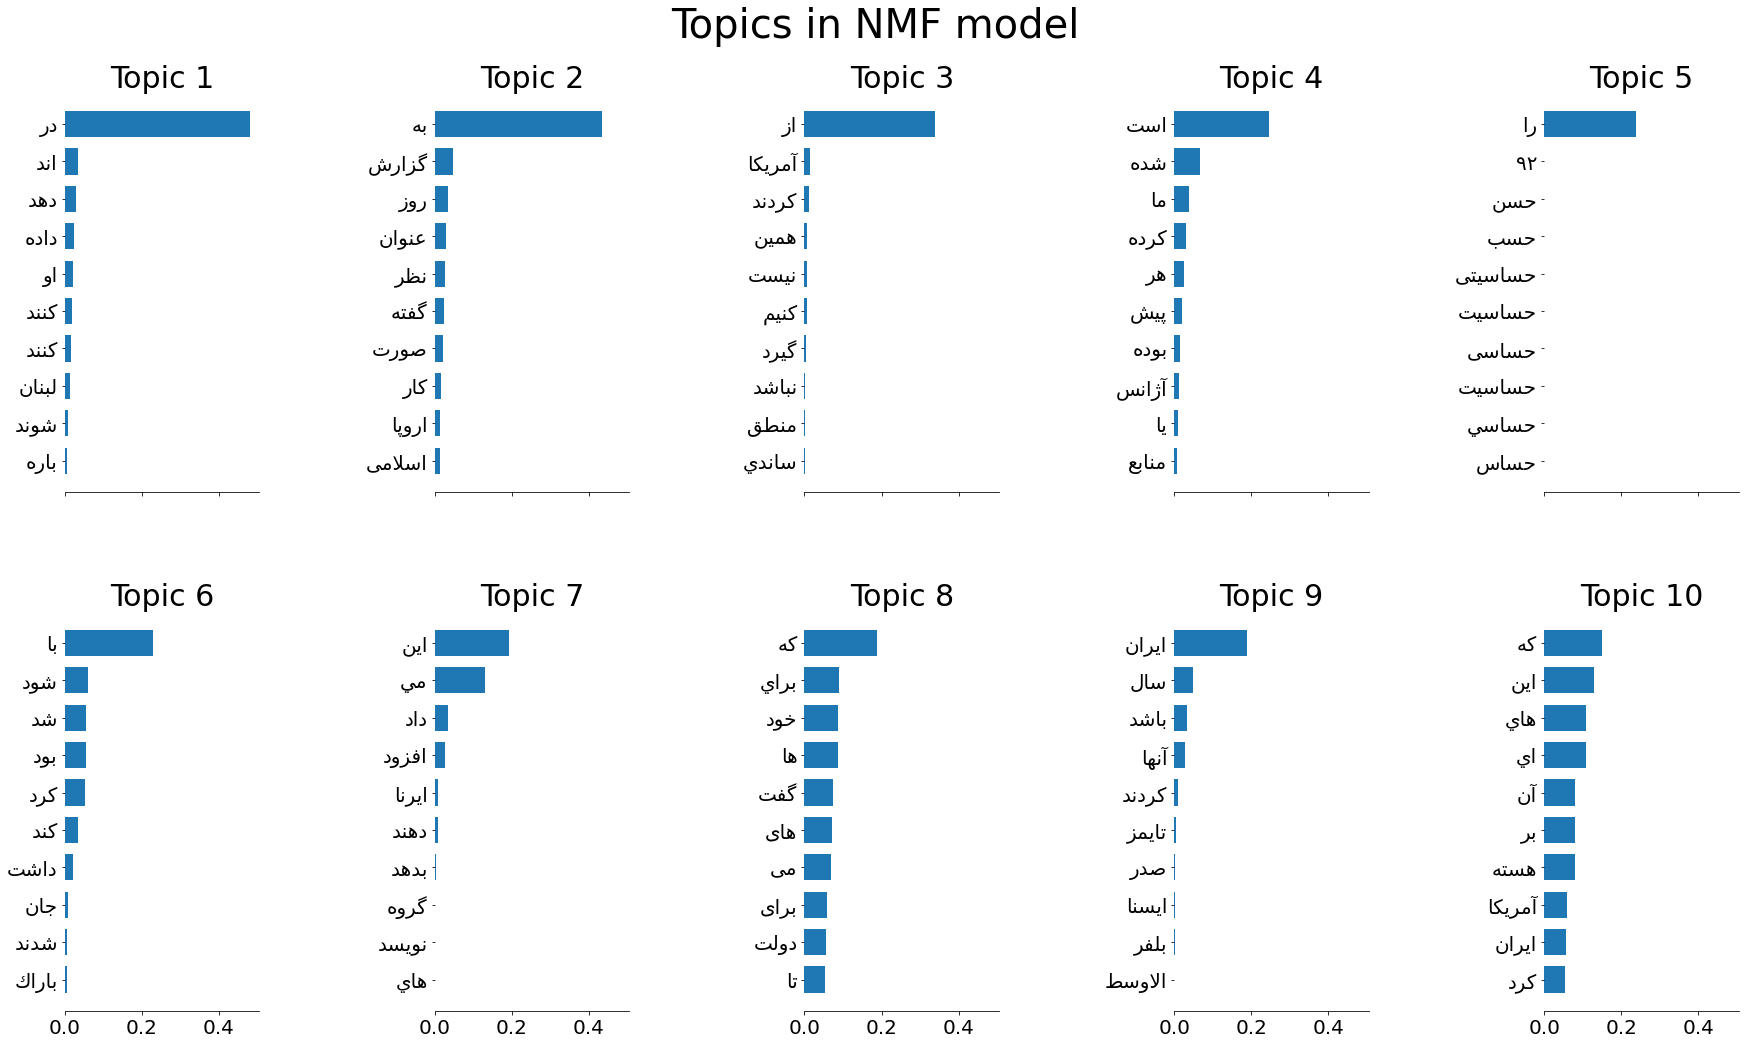

In [95]:
plot_top_words(
    nmf,
    tfidf_feature_names,
    10,
    "Topics in NMF model",
)

In [96]:
lda = LatentDirichletAllocation(
    n_components=10,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0
)

In [97]:
lda.fit(tf)


LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)

In [98]:
tf_feature_names = tf_vectorizer.get_feature_names_out()

In [99]:
tf_feature_names[:10]

array(['10', '100', '1000', '10درصد', '11', '110', '11ماهه', '12', '120',
       '12000'], dtype=object)

In [103]:
tf_feature_names2 = [make_farsi_text(t) for t in tf_feature_names]


In [101]:
top_words = 10


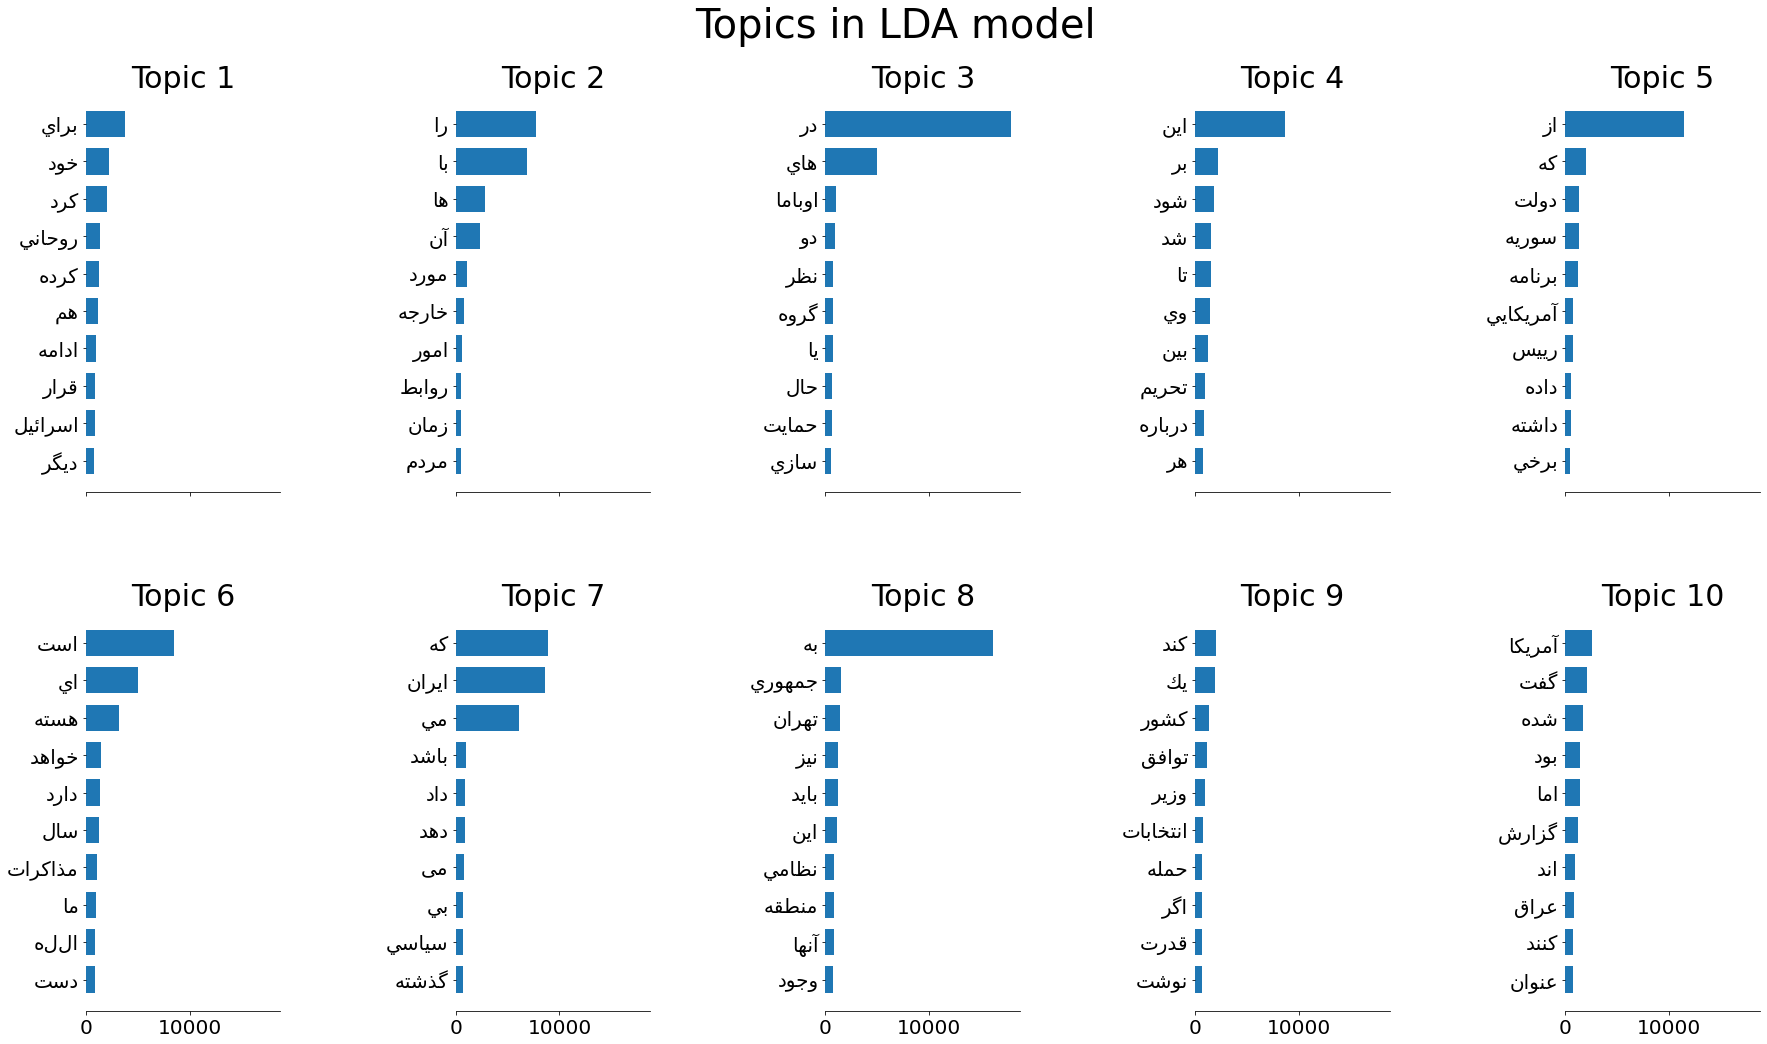

In [104]:
plot_top_words(lda, tf_feature_names2, top_words, "Topics in LDA model")


**TF/IDF Analysis Using Stanza Approach**

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import matplotlib.pyplot as plt
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=10000)
tfidf = tfidf_vectorizer.fit_transform(stanza_words)
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=10000)
tf = tf_vectorizer.fit_transform(stanza_words)
nmf = NMF(
    n_components=10,
    random_state=1,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.1,
    alpha_H=0.1,
    l1_ratio=0.5,
)

In [129]:
W = nmf.fit_transform(tfidf)


In [130]:
H = nmf.components_


In [131]:
H.shape


(10, 2636)

In [132]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()


In [133]:
tfidf_feature_names = [make_farsi_text(t) for t in tfidf_feature_names]


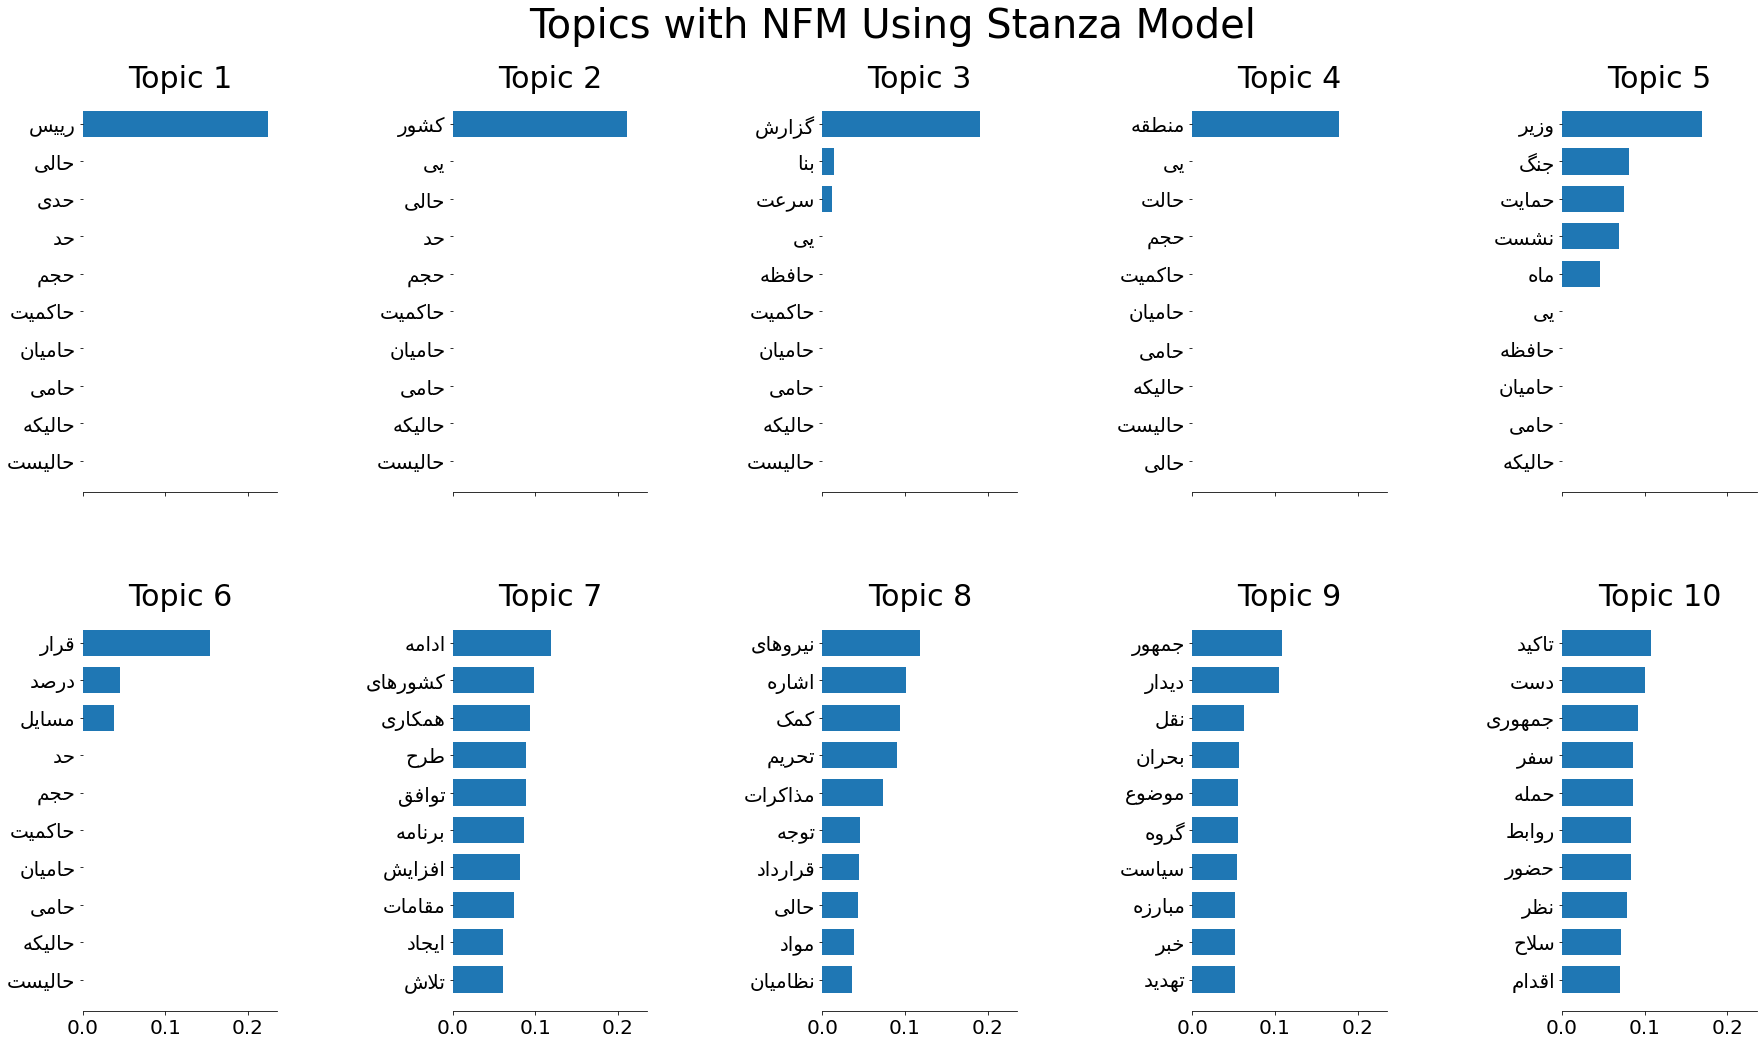

In [134]:
plot_top_words(
    nmf,
    tfidf_feature_names,
    10,
    "Topics with NFM Using Stanza Model",
)


In [135]:
lda = LatentDirichletAllocation(
    n_components=10,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0
)

In [136]:
lda.fit(tf)


LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)

In [137]:
tf_feature_names = tf_vectorizer.get_feature_names_out()


In [138]:
tf_feature_names = [make_farsi_text(t) for t in tf_feature_names]


In [139]:
top_words = 10


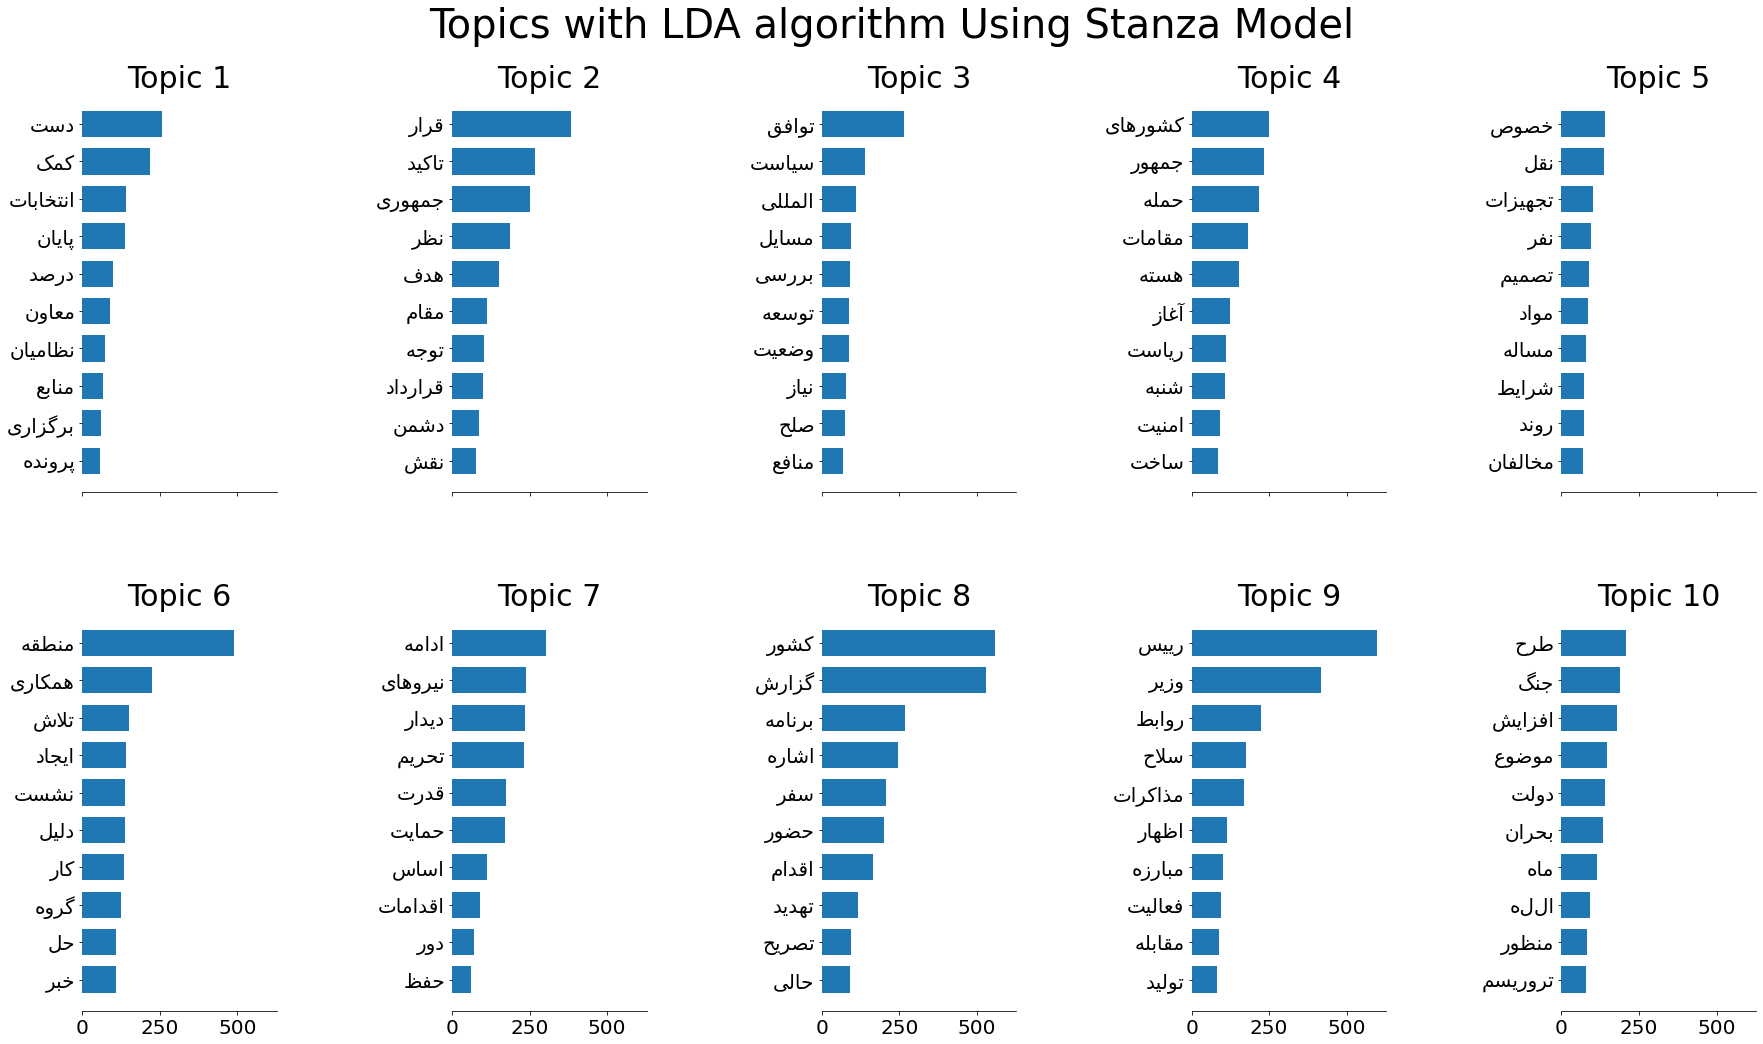

In [140]:
plot_top_words(lda, tf_feature_names, top_words, "Topics with LDA algorithm Using Stanza Model")
